# Análisis de centralidad: Redes metabólicas
## Teoría de grafos - Universidad del Rosario
### Luceth Caterine Argote Radillo<br>Samuel Fernando De Dios Pérez<br>Lukas Morera Torres<br>Escuela de Ingeniería, Ciencia y Tecnología

# **Lectura de datos.**

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import csv

In [ ]:
#LISTAS DE NODOS
metabolitos = []
reacciones  = []



#leer los metabolitos
with open('Datos/metabolitos.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        metabolitos.append(row[0].split(sep=";"))


#leer las reacciones
with open('Datos/reactivos.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='$', quotechar='|')
    for row in spamreader:
        row[0] = row[0].replace(';;', ';0;').replace(';;', ';0;')
        reacciones.append(row[0].split(sep=";"))

metabolitos_copy = metabolitos.copy()
reacciones_copy  = reacciones.copy()

# **Funciones.**

In [13]:
def find_in_list(target, py_list):
  #busca el indice de un elemento
  for i in range(len(py_list)):
    if py_list[i] == target:
      return i

def simplificar_reacciones(lista, l):
    new_list = [['id_r', 'name', 'reactivos', 'productos', 'lower_bound', 'upper_bound']]

    for i in range(1,len(lista)):
        row = lista[i]
        new_list.append([row[0], row[1],[],[],row[-2], row[-1]])
        for j in range(2,1670):
            dato = float(row[j])
            if dato <= -1:
                new_list[i][2].append(l[j])
            elif dato >= 1:
                new_list[i][3].append(l[j])
    return new_list

# **Crear grafo.**

In [ ]:
metabolitos = metabolitos_copy.copy()
reacciones  = reacciones_copy.copy()
reacciones  = simplificar_reacciones(reacciones[0:],reacciones[0])

metabolitos[0][0] = 'id_m'
metabolitos = metabolitos[0:]
reacciones  = reacciones[0:]

True

In [18]:
G = nx.DiGraph()

## Crear nodos metabolitos.

In [ ]:
nodos_metabolitos = []
for i in metabolitos:
  nodos_metabolitos.append(i[0])

G.add_nodes_from(nodos_metabolitos, bipartite=0)

## Crear nodos reacciones.

In [20]:
nodos_reacciones=[]
for i in reacciones:
  nodos_reacciones.append(i[0])

G.add_nodes_from(nodos_reacciones, bipartite=1)

## Crear aristas dirigidas.

In [ ]:
for i in range(len(reacciones)):
    for j in range(len(reacciones[i][2])):
        G.add_edge(reacciones[i][2][j], reacciones[i][0])
        nodos_metabolitos.append(reacciones[i][2][j])

    for j in range(len(reacciones[i][3])):
        G.add_edge(reacciones[i][0], reacciones[i][3][j])
        nodos_metabolitos.append(reacciones[i][3][j])

nodos_metabolitos=list(set(nodos_metabolitos))

for i in list(G.nodes()):
  if not(i in nodos_metabolitos or i in nodos_reacciones):
    print(f"Se elimino {i}.")
    G.remove_node(i)

## Verificar que el grafo esta conectado.

In [22]:
print(nx.number_weakly_connected_components(G))

1


# Definir colores (para el grafo bipartito).

In [ ]:
colores=[]

for i in G.nodes():
  if i in nodos_metabolitos:
    colores.append('red')
  elif i in nodos_reacciones:
    colores.append('blue')
  else:
    print(f"El nodo {} no esta en ningun conjunto.")

### Visualizacion del grafo.

Grafo con nombres.

Grafo con nombres:


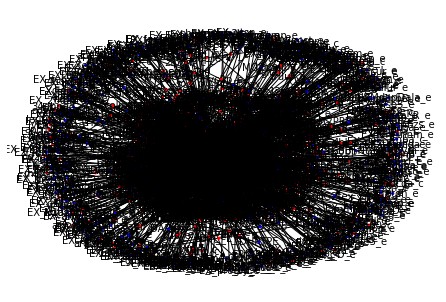

In [27]:
print("Grafo con nombres:")
nx.draw_spring(G, node_color=colores, with_labels=True, node_size=5, font_size=10)
plt.show()

Grafo sin nombres.

Grafo sin nombres:


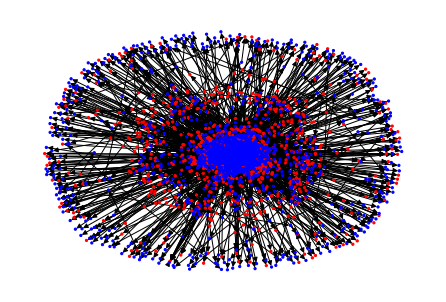

In [28]:
print("Grafo sin nombres:")
nx.draw_spring(G, node_color=colores, with_labels=False, node_size=5, font_size=10)
plt.show()

Otras formas de visualizar.

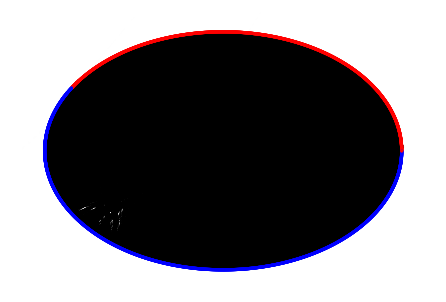

In [29]:
nx.draw_circular(G, node_color=colores, with_labels=False, node_size=5, font_size=10)
plt.show()

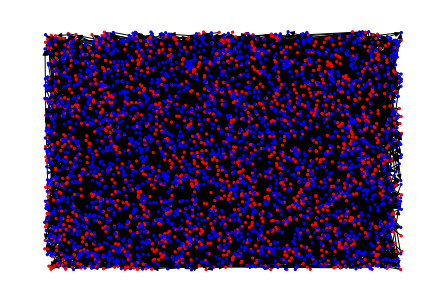

In [30]:
nx.draw_random(G, node_color=colores, with_labels=False, node_size=5, font_size=10)
plt.show()

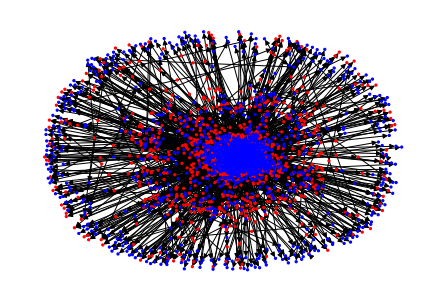

In [31]:
nx.draw_spring(G, node_color=colores, with_labels=False, node_size=5, font_size=10)
plt.show()

## Grafo fuertemente conexo.

In [41]:
G_F = G.copy()

nf=nx.number_strongly_connected_components(G_F)
cf=nx.strongly_connected_components(G_F)

Eliminar todos los nodos aislados.

In [42]:
lista_eliminar=[]
for i in cf:
  if len(i)==1:
    lista_eliminar+=list(i)

G_F.remove_nodes_from(lista_eliminar)

Creacion del grafo fuertemente conexo

In [43]:
nodos_metabolitos_fconexo = []
for i in nodos_metabolitos:
  if i in G_F.nodes():
    nodos_metabolitos_fconexo.append(i)

nodos_reacciones_fconexo = []
for i in nodos_reacciones:
  if i in G_F.nodes():
    nodos_reacciones_fconexo.append(i)

colores_G_F = []

for i in G_F.nodes():
  if i in nodos_metabolitos_fconexo:
    colores_G_F.append('red')
  elif i in nodos_reacciones_fconexo:
    colores_G_F.append('blue')

In [44]:
nx.is_strongly_connected(G_F)

True

Numero de componentes fuertemente conexas: 1


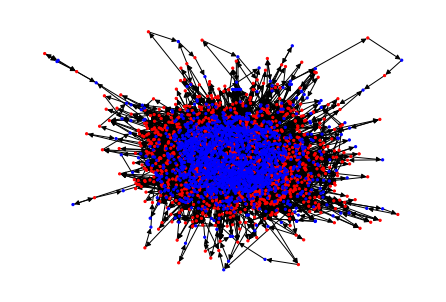

In [45]:
print(f"Numero de componentes fuertemente conexas: {nx.number_strongly_connected_components(G_F)}")
nx.draw_spring(G_F, node_color=colores_G_F, with_labels=False, node_size=5, font_size=10)
plt.show()

### Indicadores de centralidad.

#### Degree in.

In [52]:
centralidades_in = nx.in_degree_centrality(G_F)
centralidad_in_sort = dict(sorted(centralidades_in.items(), key=lambda item:item[1], reverse=True))


top=[(i,centralidades_in[i]) for i in centralidad_in_sort]

top_reacciones=[]
top_metabolitos=[]

for i in range(len(top)):
  if top[i][0] in nodos_reacciones_fconexo:
    top_reacciones.append(top[i])
  elif top[i][0] in nodos_metabolitos_fconexo:
    top_metabolitos.append(top[i])

print("Top de centralidad de todos los vértices: ", top)
print("Top de centralidad de los metabolitos: ", top_metabolitos)
print("Top de centralidad de reacciones", top_reacciones)

Top de centralidad de todos los vértices:  [('h_c', 0.25301204819277107), ('adp_c', 0.09346476816356335), ('pi_c', 0.0887185104052574), ('ppi_c', 0.04600219058050384), ('h_p', 0.03797006206644761), ('h2o_c', 0.03249361080686382), ('amp_c', 0.028842643300474625), ('co2_c', 0.02665206279664111), ('nadh_c', 0.022635998539612998), ('nadp_c', 0.022635998539612998), ('nad_c', 0.018254837531945966), ('pyr_c', 0.018254837531945966), ('pi_p', 0.017889740781307048), ('nh4_c', 0.014968966776195693), ('ACP_c', 0.014603870025556773), ('coa_c', 0.013508579773640015), ('glu__L_c', 0.011317999269806499), ('cmp_c', 0.010222709017889742), ('fe2_c', 0.008032128514056226), ('nadph_c', 0.007301935012778387), ('q8h2_c', 0.006206644760861629), ('glc__D_c', 0.005841548010222709), ('g3pe_c', 0.00547645125958379), ('g3pg_c', 0.00547645125958379), ('glyc3p_c', 0.00547645125958379), ('succ_c', 0.00547645125958379), ('ac_c', 0.005111354508944871), ('mql8_c', 0.004746257758305951), ('udp_c', 0.004746257758305951), 

#### Degree out.

In [54]:
centralidades_out = nx.out_degree_centrality(G_F)
centralidad_in_sort = dict(sorted(centralidades_out.items(), key=lambda item:item[1], reverse=True))

top_out=[(i,centralidades_out[i]) for i in centralidad_in_sort]

top_reacciones_out=[]
top_metabolitos_out=[]

for i in range(len(top)):
  if top[i][0] in nodos_reacciones_fconexo:
    top_reacciones_out.append(top[i])
  elif top[i][0] in nodos_metabolitos_fconexo:
    top_metabolitos_out.append(top[i])

print("Top de centralidad de todos los vértices: ", top_out)
print("Top de centralidad de los metabolitos: ", top_metabolitos_out)
print("Top de centralidad de reacciones", top_reacciones_out)

Top de centralidad de todos los vértices:  [('h2o_c', 0.15480102227090178), ('atp_c', 0.12230741146403798), ('h_c', 0.07667031763417306), ('h_p', 0.06498722161372764), ('h2o_p', 0.05768528660094925), ('nad_c', 0.023731288791529755), ('nadph_c', 0.02227090178897408), ('nadh_c', 0.01715954728002921), ('coa_c', 0.011683096020445418), ('pi_c', 0.010222709017889742), ('o2_c', 0.010222709017889742), ('pep_c', 0.008397225264695144), ('accoa_c', 0.008032128514056226), ('nadp_c', 0.007667031763417305), ('glyc3p_c', 0.006936838262139467), ('glu__L_c', 0.005841548010222709), ('q8_c', 0.005841548010222709), ('ser__L_c', 0.005841548010222709), ('amet_c', 0.00547645125958379), ('asp__L_c', 0.00547645125958379), ('akg_c', 0.00547645125958379), ('malACP_c', 0.005111354508944871), ('gtp_c', 0.005111354508944871), ('ctp_c', 0.004746257758305951), ('gln__L_c', 0.004746257758305951), ('fad_c', 0.004381161007667032), ('mqn8_c', 0.004381161007667032), ('na1_p', 0.004381161007667032), ('ACP_c', 0.00401606425

#### Katz.

In [55]:
katz=nx.katz_centrality_numpy(G_F, alpha=0.1, beta=1.0, normalized=True, weight=None)
katz_sort=dict(sorted(katz.items(), key=lambda item:item[1], reverse=True))

print("Top de indices de Katz: ", [(i, katz[i]) for i in katz_sort])

Top de indices de Katz:  [('h_c', 0.4068093078932391), ('nadp_c', 0.26679957616731587), ('nad_c', 0.2581774660888619), ('co2_c', 0.242430557103527), ('nadh_c', 0.16723423729656586), ('pi_c', 0.16267614736289315), ('ppi_c', 0.10714206382125643), ('adp_c', 0.10031608267732184), ('nh4_c', 0.09667312095334196), ('h2o_c', 0.08315729632223064), ('nadph_c', 0.05800389425427461), ('NADH17pp', 0.05659257738438317), ('NADH10', 0.05659257738438311), ('NADH16pp', 0.05654004184362891), ('NADH5', 0.05654004184362879), ('IDOND', 0.05628599112553475), ('NTRIR2x', 0.0561018425527127), ('LCARR', 0.05581016732136598), ('NADH18pp', 0.055719524879504094), ('NADH9', 0.055719524879504045), ('2DGULRx', 0.05570241872394544), ('ALR4x', 0.05570093697832373), ('GLYCLTDx', 0.055700640584549155), ('TRSARr', 0.055625002028298745), ('CINNDO', 0.055607284535828125), ('FADRx', 0.05555271724050357), ('MTHFR2', 0.055481126408556694), ('2DGLCNRx', 0.05545232839539259), ('DKGLCNR2x', 0.05545232839539258), ('DOGULNR', 0.055

#### Betweenness.

In [56]:
betweenness=nx.betweenness_centrality(G_F, k=None, normalized=True, weight=None, endpoints=False, seed=None)
betweenness_sort=dict(sorted(betweenness.items(), key=lambda item:item[1], reverse=True))

print("Top de indices de betweenness: ", [(i, betweenness[i]) for i in betweenness_sort])

Top de indices de betweenness:  [('h_c', 0.694201968473972), ('h2o_c', 0.3213973298875011), ('h_p', 0.2278386955770001), ('h2o_p', 0.10657836667938665), ('atp_c', 0.10379624932458822), ('ATPS4rpp', 0.07103096713738156), ('pi_c', 0.0602595659293904), ('nad_c', 0.057564886822694075), ('adp_c', 0.055540390263555936), ('PYK', 0.05442805624072664), ('nadp_c', 0.03799956492585678), ('ppi_c', 0.030804262779601577), ('co2_c', 0.026873087652740654), ('PPA', 0.025304238821532304), ('coa_c', 0.022377242817825004), ('pyr_c', 0.02181027036855302), ('NO3R1pp', 0.021644643175629776), ('CYTBDpp', 0.020896617391965064), ('CYTBO3_4pp', 0.020896617391965064), ('NO3R2pp', 0.020865741349656568), ('CYTBD2pp', 0.020123711630242118), ('mql8_c', 0.018570920892758712), ('nh4_c', 0.018084757568093673), ('NTRIR3pp', 0.017676620856973874), ('glu__L_c', 0.016887659769198125), ('q8h2_c', 0.016697121763473485), ('pi_p', 0.01661106884130614), ('nadh_c', 0.015978655857388627), ('accoa_c', 0.015293519914741885), ('NTRIR

#### Closeness.

In [57]:
close=nx.closeness_centrality(G_F, u=None, distance=None, wf_improved=True)
close_sort=dict(sorted(close.items(), key=lambda item:item[1], reverse=True))

print("Top de indices de closeness: ", [(i, close[i]) for i in close_sort])

Top de indices de closeness:  [('h_c', 0.379783693843594), ('pi_c', 0.2954692556634304), ('ADD', 0.2859678429734809), ('GUAD', 0.2850156087408949), ('CSND', 0.28489702517162474), ('ATPHs', 0.28483777038269553), ('DADA', 0.28483777038269553), ('DCYTD', 0.28483777038269553), ('ADA', 0.2847785402370555), ('CYTD', 0.2847785402370555), ('DATPHs', 0.2847785402370555), ('DCTPD', 0.2847785402370555), ('UGLYCH', 0.2847785402370555), ('ALLTAMH', 0.2847193347193347), ('DHPPDA2', 0.2847193347193347), ('GTPHs', 0.2847193347193347), ('SADH', 0.2847193347193347), ('DXPS', 0.2806927649108424), ('PYK', 0.2801186336674166), ('ACHBS', 0.2795468462951623), ('ACLS', 0.27937576499388006), ('KAS15', 0.277789046653144), ('NO3R1pp', 0.2774513776337115), ('TRDR', 0.2774513776337115), ('GLUDC', 0.27728285077951004), ('CYTBDpp', 0.27722672064777326), ('CYTBO3_4pp', 0.27722672064777326), ('GALUi', 0.27722672064777326), ('GLGC', 0.277170613236187), ('G1PTT', 0.27711452853095914), ('GLYCLTDx', 0.277002427184466), ('

## Grafo debilmente conexo.

In [47]:
G_D = G.copy()

nd = nx.number_weakly_connected_components(G_D)
cd = nx.weakly_connected_components(G_D)

Eliminar todas las componentes disconexas de la principal.

In [48]:
lista_eliminar = []
for n, i in enumerate(cd):
  if n != 0:
    lista_eliminar+=list(i)

G_D.remove_nodes_from(lista_eliminar)

Creacion del grafo fuertemente conexo

In [49]:
nodos_metabolitos_debil=[]
for i in nodos_metabolitos:
  if i in G_D.nodes():
    nodos_metabolitos_debil.append(i)

nodos_reacciones_debil=[]
for i in nodos_reacciones:
  if i in G_D.nodes():
    nodos_reacciones_debil.append(i)

colores_G_D=[]

for i in G_D.nodes():
  if i in nodos_metabolitos_debil:
    colores_G_D.append('red')
  elif i in nodos_reacciones_debil:
    colores_G_D.append('blue')

In [50]:
nx.is_weakly_connected(G_D)

True

Numero de componentes debilmente conexas: 1


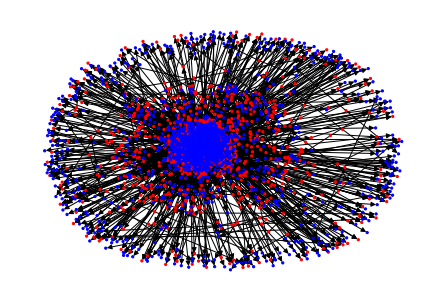

In [51]:
print(f"Numero de componentes debilmente conexas: {nx.number_weakly_connected_components(G_D)}")
nx.draw_spring(G_D, node_color=colores_G_D, with_labels=False, node_size=5, font_size=10)
plt.show()

### Indicadores de centralidad.

#### Degree in.

In [58]:
centralidades_in = nx.in_degree_centrality(G_D)
centralidad_in_sort = dict(sorted(centralidades_in.items(), key=lambda item:item[1], reverse=True))


top=[(i,centralidades_in[i]) for i in centralidad_in_sort]

top_reacciones=[]
top_metabolitos=[]

for i in range(len(top)):
  if top[i][0] in nodos_reacciones_debil:
    top_reacciones.append(top[i])
  elif top[i][0] in nodos_metabolitos_debil:
    top_metabolitos.append(top[i])

print("Top de centralidad de todos los vértices: ", top)
print("Top de centralidad de los metabolitos: ", top_metabolitos)
print("Top de centralidad de reacciones", top_reacciones)

Top de centralidad de todos los vértices:  [('h_c', 0.1719367588932806), ('adp_c', 0.06324110671936758), ('pi_c', 0.0600296442687747), ('ppi_c', 0.031126482213438732), ('h_p', 0.02618577075098814), ('h2o_c', 0.024950592885375492), ('amp_c', 0.01951581027667984), ('co2_c', 0.018033596837944664), ('nadh_c', 0.015316205533596836), ('nadp_c', 0.015316205533596836), ('pyr_c', 0.01259881422924901), ('pi_p', 0.012351778656126482), ('nad_c', 0.012351778656126482), ('nh4_c', 0.010128458498023714), ('ACP_c', 0.009881422924901184), ('coa_c', 0.009140316205533596), ('glu__L_c', 0.007905138339920948), ('cmp_c', 0.00691699604743083), ('fe2_c', 0.005434782608695652), ('nadph_c', 0.004940711462450592), ('q8h2_c', 0.004199604743083004), ('glc__D_c', 0.003952569169960474), ('g3pe_c', 0.0037055335968379445), ('g3pg_c', 0.0037055335968379445), ('glyc3p_c', 0.0037055335968379445), ('succ_c', 0.0037055335968379445), ('ac_c', 0.003458498023715415), ('glyc3p_p', 0.003211462450592885), ('mql8_c', 0.00321146245

#### Degree out.

In [59]:
centralidades_out = nx.out_degree_centrality(G_D)
centralidad_in_sort = dict(sorted(centralidades_out.items(), key=lambda item:item[1], reverse=True))

top_out=[(i,centralidades_out[i]) for i in centralidad_in_sort]

top_reacciones_out=[]
top_metabolitos_out=[]

for i in range(len(top)):
  if top[i][0] in nodos_reacciones_debil:
    top_reacciones_out.append(top[i])
  elif top[i][0] in nodos_metabolitos_debil:
    top_metabolitos_out.append(top[i])

print("Top de centralidad de todos los vértices: ", top_out)
print("Top de centralidad de los metabolitos: ", top_metabolitos_out)
print("Top de centralidad de reacciones", top_reacciones_out)

Top de centralidad de todos los vértices:  [('h2o_c', 0.10523715415019762), ('atp_c', 0.08275691699604742), ('h_c', 0.051877470355731224), ('h_p', 0.04397233201581027), ('h2o_p', 0.03903162055335968), ('nad_c', 0.016057312252964424), ('nadph_c', 0.015069169960474308), ('nadh_c', 0.011610671936758892), ('coa_c', 0.007905138339920948), ('pi_c', 0.00691699604743083), ('o2_c', 0.00691699604743083), ('pep_c', 0.005681818181818181), ('accoa_c', 0.005434782608695652), ('nadp_c', 0.005187747035573122), ('glyc3p_c', 0.004693675889328063), ('glu__L_c', 0.003952569169960474), ('q8_c', 0.003952569169960474), ('ser__L_c', 0.003952569169960474), ('amet_c', 0.0037055335968379445), ('asp__L_c', 0.0037055335968379445), ('akg_c', 0.0037055335968379445), ('malACP_c', 0.003458498023715415), ('gtp_c', 0.003458498023715415), ('ctp_c', 0.003211462450592885), ('gln__L_c', 0.003211462450592885), ('fad_c', 0.0029644268774703555), ('mqn8_c', 0.0029644268774703555), ('na1_p', 0.0029644268774703555), ('ACP_c', 0.0

#### Katz.

In [60]:
katz=nx.katz_centrality_numpy(G_D, alpha=0.1, beta=1.0, normalized=True, weight=None)
katz_sort=dict(sorted(katz.items(), key=lambda item:item[1], reverse=True))

print("Top de indices de Katz: ", [(i, katz[i]) for i in katz_sort])

Top de indices de Katz:  [('h_c', 0.4052523634148376), ('nadp_c', 0.2664979007669346), ('nad_c', 0.2578201640382144), ('co2_c', 0.2422877894730525), ('nadh_c', 0.1670769871328782), ('pi_c', 0.16037648183310274), ('ppi_c', 0.10738849310557441), ('adp_c', 0.09937131190761753), ('nh4_c', 0.09631689574736135), ('h2o_c', 0.08126403407186675), ('nadph_c', 0.057985666393010865), ('NADH10', 0.05652328448831324), ('NADH17pp', 0.056523284488313175), ('NADH16pp', 0.05647407252810416), ('NADH5', 0.05647407252810396), ('IDOND', 0.056213942491235985), ('NTRIR2x', 0.056035986565737564), ('LCARR', 0.05574338416736238), ('NADH9', 0.055649619217963596), ('NADH18pp', 0.05564961921796347), ('GLYCLTDx', 0.05563752018660373), ('ALR4x', 0.05563429284662242), ('2DGULRx', 0.0556338185064226), ('TRSARr', 0.05553905659484032), ('FADRx', 0.055494881040536), ('MTHFR2', 0.05541675695694968), ('3HCINNMH', 0.05538509137570009), ('3HPPPNH', 0.0553850913757), ('PPPNDO', 0.05538509137569925), ('CINNDO', 0.05535687738917

#### Betweenness.

In [ ]:
betweenness=nx.betweenness_centrality(G_D, k=None, normalized=True, weight=None, endpoints=False, seed=None)
betweenness_sort=dict(sorted(betweenness.items(), key=lambda item:item[1], reverse=True))

print("Top de indices de betweenness: ", [(i, betweenness[i]) for i in betweenness_sort])

#### Closeness.

In [ ]:
close=nx.closeness_centrality(G_D, u=None, distance=None, wf_improved=True)
close_sort=dict(sorted(close.items(), key=lambda item:item[1], reverse=True))

print("Top de indices de closeness: ", [(i, close[i]) for i in close_sort])

Top de indices de closeness:  [('h_c', 0.379783693843594), ('pi_c', 0.2954692556634304), ('ADD', 0.2859678429734809), ('GUAD', 0.2850156087408949), ('CSND', 0.28489702517162474), ('ATPHs', 0.28483777038269553), ('DADA', 0.28483777038269553), ('DCYTD', 0.28483777038269553), ('ADA', 0.2847785402370555), ('CYTD', 0.2847785402370555), ('DATPHs', 0.2847785402370555), ('DCTPD', 0.2847785402370555), ('UGLYCH', 0.2847785402370555), ('ALLTAMH', 0.2847193347193347), ('DHPPDA2', 0.2847193347193347), ('GTPHs', 0.2847193347193347), ('SADH', 0.2847193347193347), ('DXPS', 0.2806927649108424), ('PYK', 0.2801186336674166), ('ACHBS', 0.2795468462951623), ('ACLS', 0.27937576499388006), ('KAS15', 0.277789046653144), ('NO3R1pp', 0.2774513776337115), ('TRDR', 0.2774513776337115), ('GLUDC', 0.27728285077951004), ('CYTBDpp', 0.27722672064777326), ('CYTBO3_4pp', 0.27722672064777326), ('GALUi', 0.27722672064777326), ('GLGC', 0.277170613236187), ('G1PTT', 0.27711452853095914), ('GLYCLTDx', 0.277002427184466), ('